In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt

JOBS = {
    'A': {'release' : 2, 'duration': 5, 'due': 10},
    'B': {'release' : 5, 'duration': 6, 'due': 21},
    'C': {'release' : 4, 'duration': 8, 'due': 15},
    'D': {'release' : 0, 'duration': 4, 'due': 10},
    'E': {'release' : 0, 'duration': 2, 'due': 5},
    'F': {'release' : 8, 'duration': 3, 'due': 15},
    'G': {'release' : 9, 'duration': 2, 'due': 22},
}
JOBS


   
 

{'A': {'release': 2, 'duration': 5, 'due': 10},
 'B': {'release': 5, 'duration': 6, 'due': 21},
 'C': {'release': 4, 'duration': 8, 'due': 15},
 'D': {'release': 0, 'duration': 4, 'due': 10},
 'E': {'release': 0, 'duration': 2, 'due': 5},
 'F': {'release': 8, 'duration': 3, 'due': 15},
 'G': {'release': 9, 'duration': 2, 'due': 22}}

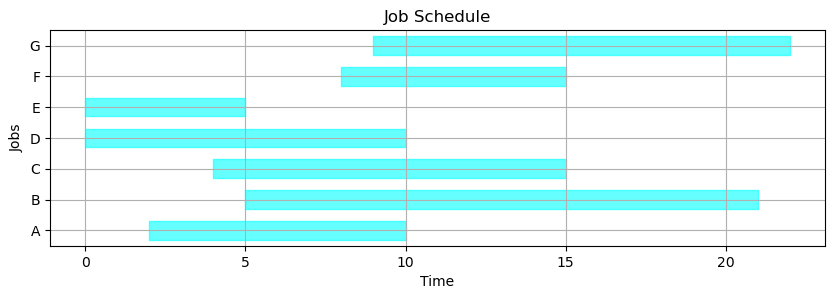

In [2]:
def gantt(JOBS,SCHEDULE={}):
    bw = 0.3

    plt.figure(figsize=(10, 0.4*(len(JOBS.keys()))))

    idx = 0
    for j in sorted(JOBS.keys()):
        x= JOBS[j]['release']
        y= JOBS[j]['due']

        plt.fill_between([x,y],[idx-bw,idx-bw], [idx + bw, idx + bw], color='cyan', alpha=0.6)

        if j in SCHEDULE.keys():
            x = SCHEDULE[j]['start']
            y = SCHEDULE[j]['finish']
            plt.fill_between([x,y],[idx-bw,idx-bw],[idx+bw,idx+bw], color='red', alpha=0.5)
            plt.plot([x,y,y,x,x], [idx-bw,idx-bw,idx+bw,idx+bw,idx-bw], color='k')
            plt.text((SCHEDULE[j]['start'] +SCHEDULE[j]['finish'])/2.0, idx,'Job' + j, color='white', weight='bold', horizontalalignment='center', verticalalignment='center')
        idx += 1

    plt.ylim(-0.5, idx-0.5)
    plt.title('Job Schedule')
    plt.xlabel('Time')
    plt.ylabel('Jobs')
    plt.yticks(range(len(JOBS)), JOBS.keys())
    plt.grid()
    xlim = plt.xlim()
    
    if SCHEDULE :
       for j in SCHEDULE.keys():
          if 'machine' not in SCHEDULE[j].keys():
            SCHEDULE[j]['machine'] = 1
       MACHINES = sorted(set([SCHEDULE[j]['machine'] for j in SCHEDULE.keys()]))

       plt.figure(figsize=(10, 0.5*len(MACHINES)))
       for j in sorted(SCHEDULE.keys()):
        idx = MACHINES.index(SCHEDULE[j]['machine'])
        x = SCHEDULE[j]['start']
        y = SCHEDULE[j]['finish']
        plt.fill_between([x,y],[idx-bw,idx-bw],[idx+bw,idx+bw], color='red', alpha=0.5)
        plt.plot([x,y,y,x,x], [idx-bw,idx-bw,idx+bw,idx+bw,idx-bw], color='k')
        plt.text((SCHEDULE[j]['start'] + SCHEDULE[j]['finish'])/2.0, idx,
                 'Job' + j, color='white', weight='bold',
                 horizontalalignment='center', verticalalignment='center')

        plt.xlim(xlim)
        plt.ylim(-0.5, len(MACHINES)-0.5)
        plt.title('Machine Schedule')
        plt.yticks(range(len(MACHINES)), MACHINES)
        plt.xlabel('Time')
        plt.ylabel('Machines')
        plt.grid()
        
gantt(JOBS)

In [3]:
def schedule(JOBS, order = sorted(JOBS.keys())):
    start = 0
    finish = 0 
    SCHEDULE = {}
    for job in order:
         start = max(JOBS[job]['release'], finish)
         finish = start + JOBS[job]['duration']
         SCHEDULE[job] = {'start': start, 'finish': finish}
    return SCHEDULE



{'A': {'finish': 11, 'start': 6},
 'B': {'finish': 30, 'start': 24},
 'C': {'finish': 24, 'start': 16},
 'D': {'finish': 6, 'start': 2},
 'E': {'finish': 2, 'start': 0},
 'F': {'finish': 14, 'start': 11},
 'G': {'finish': 16, 'start': 14}}


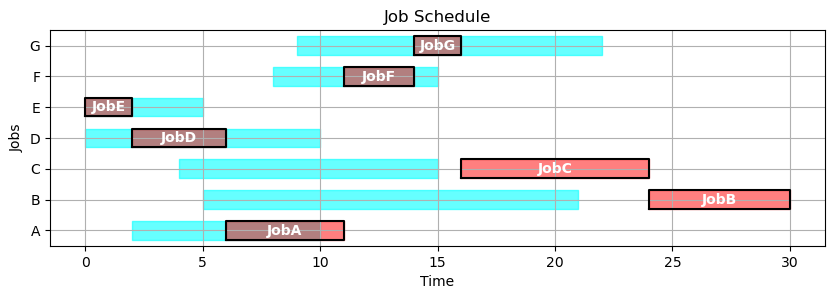

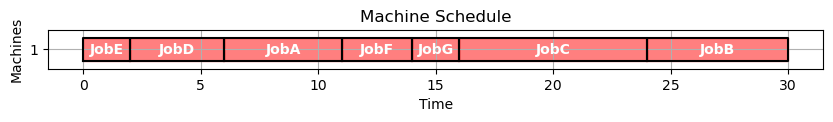

In [4]:
import pprint as pp
SCHEDULE = schedule(JOBS, ['E', 'D', 'A', 'F', 'G', 'C', 'B'])
pp.pprint(SCHEDULE)
gantt(JOBS, SCHEDULE)

In [5]:
def kpi(JOBS, SCHEDULE):
    KPI= {}
    KPI['makespan'] = max(SCHEDULE[j]['finish'] for j in SCHEDULE)
    KPI['Max Pastdue'] = max(max(0, SCHEDULE[j]['finish'] - JOBS[j]['due']) for j in SCHEDULE)
    KPI['Sum on Pastdue'] = sum(max(0, SCHEDULE[j]['finish'] - JOBS[j]['due']) for j in SCHEDULE)
    KPI['Number Pastdue'] = sum(SCHEDULE[j]['finish'] > JOBS[j]['due'] for j in SCHEDULE)
    KPI['Number on Time'] = sum(SCHEDULE[j]['finish'] <= JOBS[j]['due'] for j in SCHEDULE)
    KPI['Fractoin on Time'] = KPI['Number on Time'] / len(SCHEDULE)
    return KPI
    
kpi(JOBS, SCHEDULE)

{'makespan': 30,
 'Max Pastdue': 9,
 'Sum on Pastdue': 19,
 'Number Pastdue': 3,
 'Number on Time': 4,
 'Fractoin on Time': 0.5714285714285714}

{'makespan': 30,
 'Max Pastdue': 13,
 'Sum on Pastdue': 31,
 'Number Pastdue': 6,
 'Number on Time': 1,
 'Fractoin on Time': 0.14285714285714285}

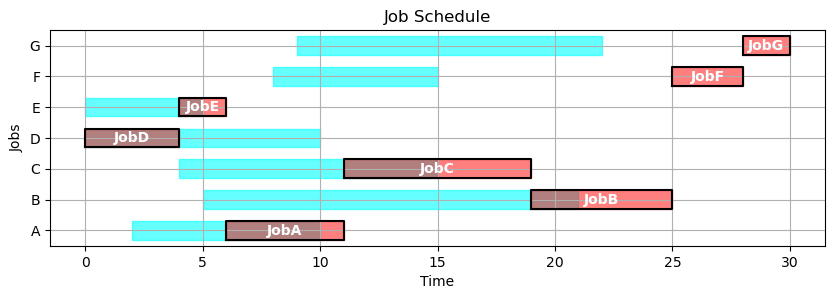

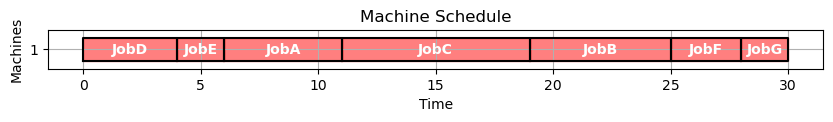

In [6]:
def fcfs(JOBS):
    order_by_release = sorted(JOBS.keys(), key=lambda j: JOBS[j]['release'])
    return schedule(JOBS, order_by_release)

SCHEDULE = fcfs(JOBS)
gantt(JOBS, SCHEDULE)
kpi(JOBS, SCHEDULE)
    

candidates = {'E': 0, 'D': 0}
candidates = {'A': 2, 'D': 0}
candidates = {'B': 5, 'D': 0, 'C': 4}
candidates = {'F': 8, 'D': 0, 'G': 9, 'C': 4}
candidates = {'F': 8, 'D': 0, 'C': 4}
candidates = {'D': 0, 'C': 4}
candidates = {'D': 0}


{'makespan': 30,
 'Max Pastdue': 20,
 'Sum on Pastdue': 34,
 'Number Pastdue': 3,
 'Number on Time': 4,
 'Fractoin on Time': 0.5714285714285714}

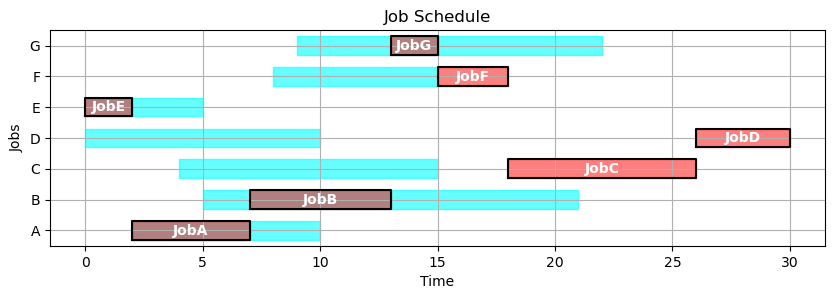

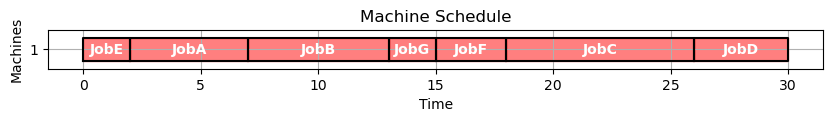

In [12]:
def lcfs(JOBS):
    unfinished_jobs = set(JOBS.keys())

    start = 0

    while len(unfinished_jobs) > 0:
        start = max(start, min(JOBS[job]['release'] for job in unfinished_jobs))

        candidates = {job: JOBS[job]['release'] for job in unfinished_jobs
                  if JOBS[job]['release'] <= start}

        print(f'{candidates = }')

        job = max(candidates, key=candidates.get)

        finish = start + JOBS[job]['duration']

        unfinished_jobs.remove(job)

        SCHEDULE[job] = {'machine': 1, 'start': start, 'finish': finish}

        start = finish

    return SCHEDULE

SCHEDULE = lcfs(JOBS)
gantt(JOBS, SCHEDULE)
kpi(JOBS, SCHEDULE)
        

candidates = {'E': 5, 'D': 10}
candidates = {'A': 10, 'D': 10}
candidates = {'B': 21, 'D': 10, 'C': 15}
candidates = {'B': 21, 'F': 15, 'G': 22, 'C': 15}
candidates = {'B': 21, 'G': 22, 'C': 15}
candidates = {'B': 21, 'G': 22}
candidates = {'G': 22}


{'makespan': 30,
 'Max Pastdue': 8,
 'Sum on Pastdue': 23,
 'Number Pastdue': 4,
 'Number on Time': 3,
 'Fractoin on Time': 0.42857142857142855}

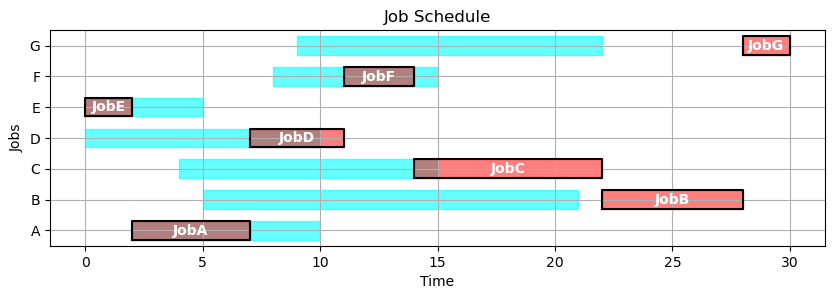

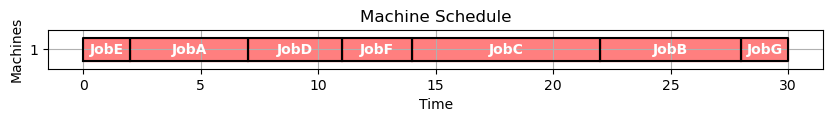

In [8]:
def edd(JOBS):

    unfinished_jobs = set(JOBS.keys())
    start = 0

    while len(unfinished_jobs) > 0:

        start = max(start, min(JOBS[job]['release'] for job in unfinished_jobs))
        
        candidates = {job:JOBS[job]['due'] for job in unfinished_jobs
                      if JOBS[job]['release'] <= start}

        print(f'{candidates = }')

        job = min(candidates, key=candidates.get)

        finish = start + JOBS[job]['duration']

        unfinished_jobs.remove(job)

        SCHEDULE[job] = {'machine': 1, 'start': start, 'finish': finish}

        start = finish

    return SCHEDULE


SCHEDULE = edd(JOBS)
gantt(JOBS, SCHEDULE)
kpi(JOBS, SCHEDULE)

candidates = {'E': 2, 'D': 4}
candidates = {'A': 5, 'D': 4}
candidates = {'B': 6, 'A': 5, 'C': 8}
candidates = {'B': 6, 'F': 3, 'G': 2, 'C': 8}
candidates = {'B': 6, 'F': 3, 'C': 8}
candidates = {'B': 6, 'C': 8}
candidates = {'C': 8}


{'makespan': 30,
 'Max Pastdue': 15,
 'Sum on Pastdue': 18,
 'Number Pastdue': 4,
 'Number on Time': 3,
 'Fractoin on Time': 0.42857142857142855}

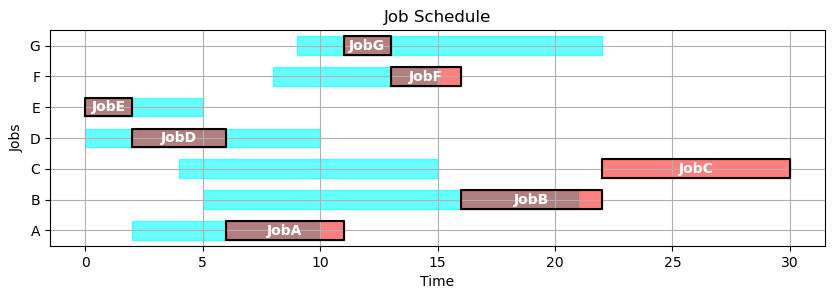

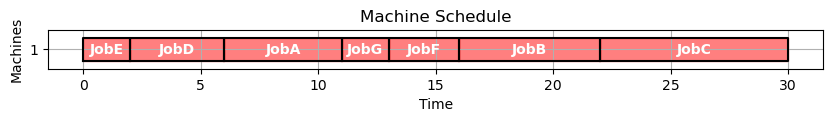

In [13]:
def spt(JOBS):

    unfinished_jobs = set(JOBS.keys())

    start = 0


    while len(unfinished_jobs) > 0:
        start = max(start, min(JOBS[job]['release'] for job in unfinished_jobs))

        candidates = {job:JOBS[job]['duration'] for job in unfinished_jobs
                      if JOBS[job]['release'] <= start}
        print(f'candidates = {candidates}')
        job = min(candidates, key=candidates.get)

        finish = start + JOBS[job]['duration']

        unfinished_jobs.remove(job)

        SCHEDULE[job] = {'machine': 1, 'start': start, 'finish': finish}

        start = finish

    return SCHEDULE


SCHEDULE = spt(JOBS)
gantt(JOBS, SCHEDULE)
kpi(JOBS, SCHEDULE)

{'makespan': 30,
 'Max Pastdue': 15,
 'Sum on Pastdue': 18,
 'Number Pastdue': 4,
 'Number on Time': 3,
 'Fractoin on Time': 0.42857142857142855}

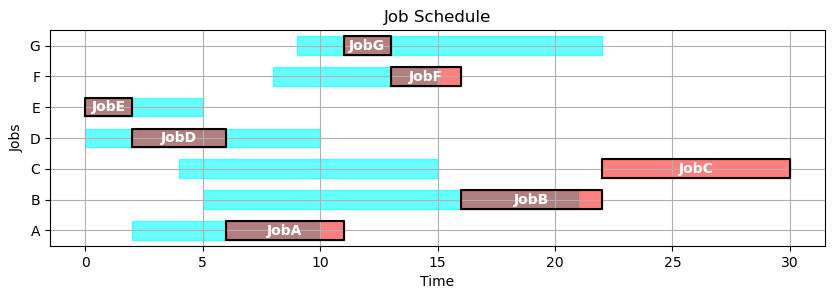

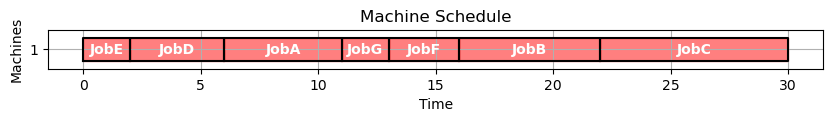

In [9]:
import random  

def dispaching(JOBS, target="duration", obj=min):

    unfinished_jobs = set(JOBS.keys())

    start = 0

    while len(unfinished_jobs) > 0:
        start = max(start, min(JOBS[job]['release'] for job in unfinished_jobs))

        if target == 'rand':
            for job in unfinished_jobs:
                JOBS[job][target] = random.random()

        if target == 'slack':
            for job in unfinished_jobs:
                JOBS[job][target] = (JOBS[job]['due'] - start) - JOBS[job]['duration']

        if target == 'cr':
            for job in unfinished_jobs:
                JOBS[job][target] = (JOBS[job]['due'] - start) / JOBS[job]['duration']

        candidates = {job:JOBS[job][target] for job in unfinished_jobs
                      if JOBS[job]['release'] <= start}
        job = obj(candidates, key=candidates.get)

        finish = start + JOBS[job]['duration']

        unfinished_jobs.remove(job)

        SCHEDULE[job] = {'machine': 1, 'start': start, 'finish': finish}

        start = finish

    return SCHEDULE

SCHEDULE = dispaching(JOBS, target='duration', obj=min)  
gantt(JOBS, SCHEDULE)
kpi(JOBS, SCHEDULE)

apt 'gdp.hull' instead.  (deprecated in 5.7) (called from
c:\Users\kimdo\miniforge3\Lib\site-packages\pyomo\common\factory.py:41)


{'makespan': 30.0,
 'Max Pastdue': 15.0,
 'Sum on Pastdue': 16.0,
 'Number Pastdue': 2,
 'Number on Time': 5,
 'Fractoin on Time': 0.7142857142857143}

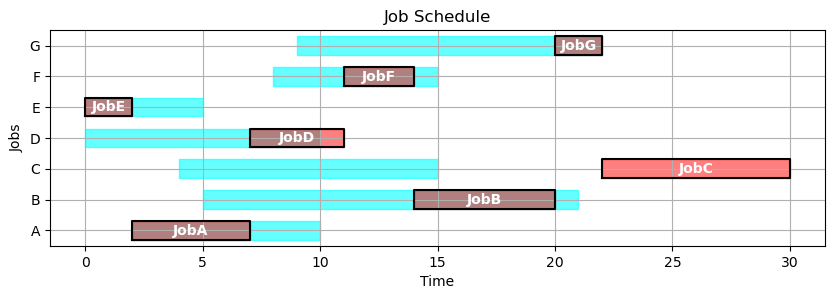

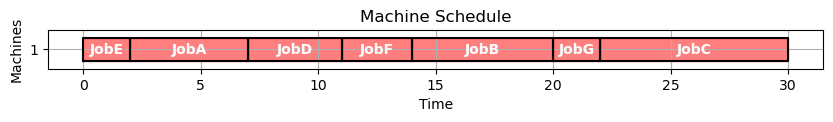

In [10]:
from pyomo.gdp import *  

def opt_schedule(JOBS):

    m = ConcreteModel()

    m.J = Set(initialize=JOBS.keys())
    m.PAIRS = Set(initialize = m.J * m.J, dimen=2, filter=lambda m, j, k : j < k)

    tmax = max([JOBS[j]['release'] for j in m.J]) + sum([JOBS[j]['duration'] for j in m.J])

    m.start = Var(m.J, domain=NonNegativeReals, bounds=(0, tmax))
    m.pastdue = Var(m.J, domain=NonNegativeReals, bounds=(0, tmax))
    m.early = Var(m.J, domain=NonNegativeReals, bounds=(0, tmax))
    m.makespan = Var(domain=NonNegativeReals, bounds=(0, tmax))
    m.maxpastdue = Var(domain=NonNegativeReals, bounds=(0, tmax))
    m.ispastdue = Var(m.J, domain=Binary)

    m.obj = Objective(expr = sum([m.pastdue[j] for j in m.J]), sense = minimize)
    m.c1 = Constraint(m.J, rule=lambda m, j: m.start[j] >= JOBS[j]['release'])
    m.c2 = Constraint(m.J, rule=lambda m, j: m.start[j] + JOBS[j]['duration'] + m.early[j] == JOBS[j]['due'] + m.pastdue[j])
    m.c3 = Disjunction(m.PAIRS, rule=lambda m, j, k:
        [m.start[j] + JOBS[j]['duration'] <= m.start[k],
         m.start[k] + JOBS[k]['duration'] <= m.start[j]])  
    m.c4 = Constraint(m.J, rule=lambda m, j: m.pastdue[j] <= m.maxpastdue)
    m.c5 = Constraint(m.J, rule=lambda m, j: m.start[j] + JOBS[j]['duration'] <= m.makespan)
    m.c6 = Constraint(m.J, rule=lambda m, j: m.pastdue[j] <= tmax * m.ispastdue[j])

    TransformationFactory('gdp.chull').apply_to(m)
    SolverFactory('glpk').solve(m)

    SCHEDULE = {}
    for j in m.J:
        SCHEDULE[j] = {
            'machine': 1,
            'start': m.start[j](),
            'finish': m.start[j]() + JOBS[j]['duration']}

    return SCHEDULE

SCHEDULE = opt_schedule(JOBS)
gantt(JOBS, SCHEDULE)
kpi(JOBS, SCHEDULE)

In [11]:
import pandas as pd

result = pd.DataFrame(columns=['Makespan', 'Max Pastdue', 'Sum on Pastdue',
                             'Number Pastdue', 'Number on Time', 'Fractoin on Time'])

methods = [('FCFS', 'release' , min), ('LCFS', 'release', max), ('SPT', 'duration', min),
           ('LPT', 'duration', max), ('EDD', 'due', min), ('CR', 'cr', min),
           ('RAND', 'rand', min), ('OPT', _, _)]

for method , target, obj in methods:
    if method == 'OPT':
        SCHEDULE = opt_schedule(JOBS)
    else:
        SCHEDULE = dispaching(JOBS, target , obj)
    KPI = kpi(JOBS, SCHEDULE)
    result.loc[method] = [KPI['makespan'], KPI['Max Pastdue'],
                          KPI['Sum on Pastdue'], KPI['Number Pastdue'],
                          KPI['Number on Time'], KPI['Fractoin on Time']]
result
            


,Makespan,Max Pastdue,Sum on Pastdue,Number Pastdue,Number on Time,Fractoin on Time
FCFS,30.0,13.0,30.0,5.0,2.0,0.285714
LCFS,30.0,20.0,34.0,3.0,4.0,0.571429
SPT,30.0,15.0,18.0,4.0,3.0,0.428571
LPT,30.0,23.0,55.0,4.0,3.0,0.428571
EDD,30.0,8.0,23.0,4.0,3.0,0.428571
CR,30.0,8.0,27.0,5.0,2.0,0.285714
RAND,30.0,12.0,38.0,5.0,2.0,0.285714
OPT,30.0,15.0,16.0,2.0,5.0,0.714286
